In [151]:
import pandas as pd
df = pd.read_csv('../bayes/datos2.csv', delimiter = ";").astype(str)
df.head(3)

,category,label,title,company,profile
0,Administración y gestión de empresas,1,se busca analista de reclutamiento,chazki,procesos de reclutamiento y adquisición de tal...
1,Administración y gestión de empresas,1,se busca analista de reclutamiento,chazki,procesos de reclutamiento y adquisición de tal...
2,Administración y gestión de empresas,1,auxiliar de recursos humanos,zen consultores,esta vacante viene de la bolsa de empleo talen...


In [152]:
print(df['profile'][0])

procesos de reclutamiento y adquisición de talento.experiencia en reclutamiento masivo en el area de logística ,seguridad privada o call center indispensable.ofrecer apoyo a los empleados en varios temas relacionados con rr. hh., como permisos, compensaciones y solucionar cualquier problema que pueda surgir.mantener registros y archivos de empleadosgarantizar el cumplimiento de las normativas laboralesapoyar en todas las actividades relacionadas con reclutamiento, local foráneo. reclutar y filtrar candidatos idóneos para los diferentes puestosrealizar y redactar las publicaciones de los requerimientos de acuerdo al perfil indicadoescolaridad: licenciatura concluida o trunca de psicología industrial, o administración de empresas.sexo: indistintoedad: 21 en adelanteexperiencia: mínima de 3 años en puesto similar (reclutamiento y selección)competencias:· iniciativa· dinamismo· buena organización· capacidad y criterio en toma de decisiones· buen manejo de relaciones interpersonales· capaci

In [153]:
col = ['category', 'profile']
df = df[col]
df = df[pd.notnull(df['profile'])]

df.columns = ['category', 'profile']

df['category_id'] = df['category'].factorize()[0]

category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)
df.head(10)

,category,profile,category_id
0,Administración y gestión de empresas,procesos de reclutamiento y adquisición de tal...,0
1,Administración y gestión de empresas,procesos de reclutamiento y adquisición de tal...,0
2,Administración y gestión de empresas,esta vacante viene de la bolsa de empleo talen...,0
3,Administración y gestión de empresas,"somos una empresa mexicana, líder en el giro d...",0
4,Administración y gestión de empresas,en solvento nos encontramos en búsqueda de tu ...,0
5,Administración y gestión de empresas,esta vacante viene de la bolsa de empleo talen...,0
6,Administración y gestión de empresas,mcdonald´s busca nuevo talentote invitamos a c...,0
7,Administración y gestión de empresas,solicita: analista de adp.objetivo del puestoa...,0
8,Administración y gestión de empresas,más que buscar un trabajo… busco formar parte ...,0
9,Administración y gestión de empresas,esta vacante viene de la bolsa de empleo talen...,0


# Imbalanced Classes

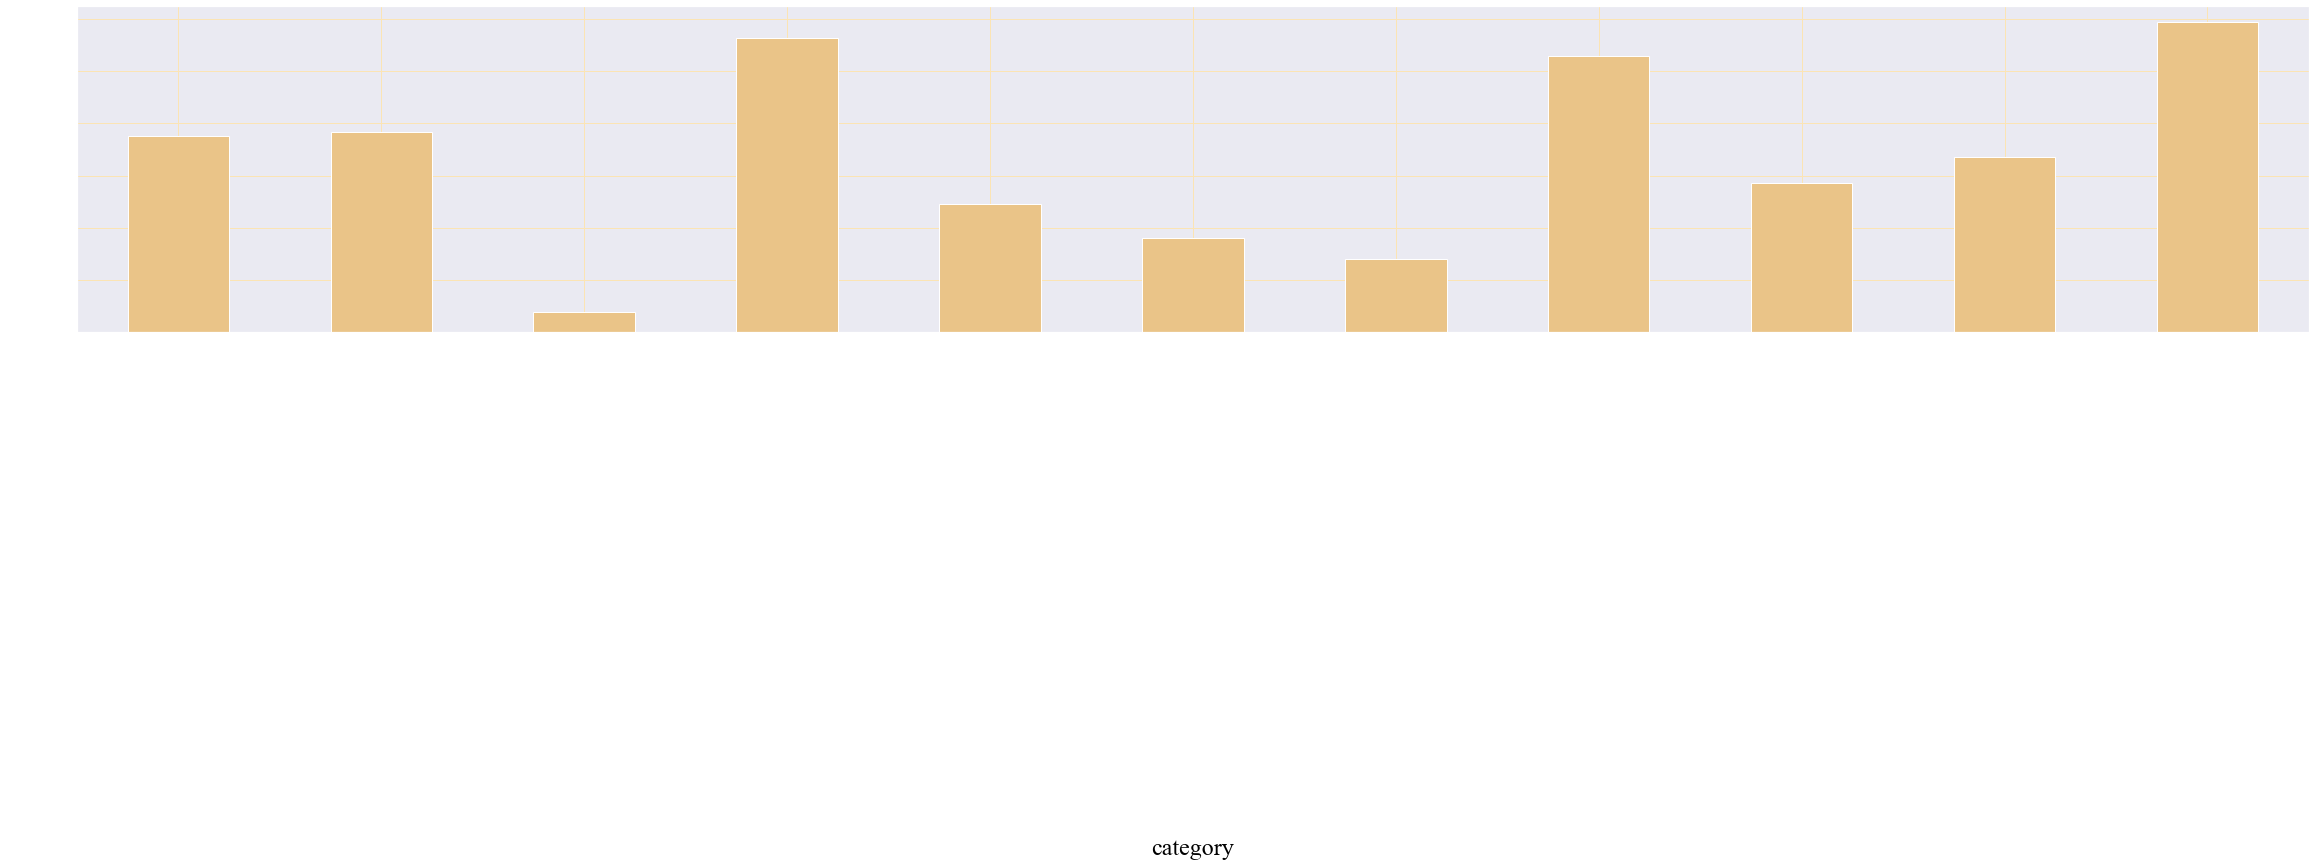

In [163]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(40,6))
ax = plt.axes()

ax.xaxis.label.set_color('black')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='y', colors='white')
# ax.set_facecolor("#0c1621")
# ax.set_title('Indeed', fontsize=40, color= 'white', fontweight='bold')
# ax.axes.xaxis.set_visible(False)
# ax.grid(False)

# # Hide axes ticks
# ax.set_xticks([])
# ax.set_yticks([])

df.groupby('category').profile.count().plot.bar(ylim=0,color="#eac488")

plt.rc('font',family='Times New Roman')
plt.xticks(fontsize=20, rotation=90, family='Times New Roman')
plt.yticks(fontsize=30, family='Times New Roman')
plt.grid(color = '#fbe4b4', linewidth = 1)

plt.savefig("1.png", transparent=True)


## Text Representation


In [11]:
from nltk.corpus import stopwords
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

my_stop_words = text.ENGLISH_STOP_WORDS.union(stopwords.words('spanish'))
print(my_stop_words)

frozenset({'estaría', 'everyone', 'whereas', 'mucho', 'estéis', 'estarás', 'hereupon', 'us', 'get', 'sixty', 'tuvisteis', 'below', 'estés', 'seáis', 'muchos', 'several', 'tiene', 'fuiste', 'always', 'though', 'vuestra', 'anyway', 'such', 'vosotras', 'seamos', 'whole', 'estoy', 'estuviera', 'very', 'habríais', 'between', 'with', 'through', 'fuimos', 'un', 'ourselves', 'anyhow', 'tengas', 'be', 'otherwise', 'many', 're', 'todo', 'too', 'fuisteis', 'hubiéramos', 'hubiesen', 'cannot', 'seríamos', 'his', 'estaréis', 'most', 'estando', 'move', 'it', 'vuestros', 'becoming', 'thru', 'tengo', 'ante', 'tenían', 'nada', 'even', 'whereafter', 'sería', 'tenida', 'sentida', 'estará', 'estuvierais', 'estuvisteis', 'estuviste', 'our', 'hube', 'so', 'fifty', 'had', 'off', 'still', 'fifteen', 'take', 'my', 'enough', 'might', 'hers', 'because', 'whom', 'would', 'fueseis', 'habíamos', 'estaríais', 'mis', 'por', 'tuyo', 'tenías', 'vuestro', 'tenga', 'seríais', 'sean', 'onto', 'estos', 'este', 'tengamos', '

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=my_stop_words)

In [14]:
features = tfidf.fit_transform(df.profile).toarray()
labels = df.category_id
features.shape

(9174, 55407)

In [15]:
from sklearn.feature_selection import chi2
import numpy as np
N = 3
for jobs, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  
  print("# '{}':".format(jobs))
  print("  * Most correlated unigrams:\n- {}".format('\n- '.join(unigrams[-N:])))
  print("  * Most correlated bigrams:\n- {}".format('\n- '.join(bigrams[-N:])))

# 'Administración y gestión de empresas':
  * Most correlated unigrams:
- gastronomía
- ventas
- administración
  * Most correlated bigrams:
- lic administración
- licenciatura administración
- administración empresas
# 'Ayudante General':
  * Most correlated unigrams:
- limpieza
- secundaria
- ayudante
  * Most correlated bigrams:
- carga descarga
- secundaria terminada
- ayudante general
# 'Ciencias de la computación':
  * Most correlated unigrams:
- ciencias
- computación
- planet
  * Most correlated bigrams:
- dedicada implementación
- planet media
- ciencias computación
# 'Contabilidad y fiscalización':
  * Most correlated unigrams:
- impuestos
- contable
- contabilidad
  * Most correlated bigrams:
- conciliaciones bancarias
- experiencia contabilidad
- contabilidad general
# 'Derecho':
  * Most correlated unigrams:
- derechos
- abogado
- derecho
  * Most correlated bigrams:
- experiencia abogado
- lic derecho
- licenciatura derecho
# 'Docencia':
  * Most correlated unigrams:
- im

## Model Selection

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['profile'], df['category'], random_state = 0)


count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
print (len(models))

4


In [17]:
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []


for model in models: 
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

c:\Users\Ricardo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Ricardo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

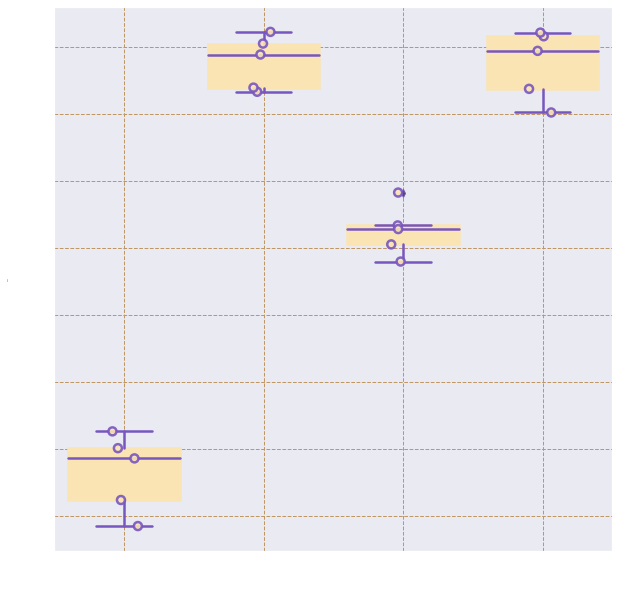

In [244]:
import seaborn as sns

fig = plt.figure(figsize=(10,10),facecolor='white')
plt.rc('font',family='Times New Roman')
ax = plt.axes()

c = "#7756BF"
b = "#fbe4b4"

sns.boxplot(x='model_name', y='accuracy',
    boxprops=dict(facecolor=c, color=b), 
    capprops=dict(color=c),
    whiskerprops=dict(color=c),
    flierprops=dict(color=c, markeredgecolor=c),
    medianprops=dict(color=c),
    data=cv_df, linewidth=2.5
    )

sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
    size=8, jitter=True,color=b, edgecolor=c, alpha=.90,
    linewidth=2.5, 
    )

plt.xticks(rotation=0,fontsize=18)
plt.yticks(fontsize=18)
plt.grid(color = '#BF9765', linestyle = '--', linewidth = 1)
# plt.tick_params(axis='both', which='major', labelsize=18)

ax.xaxis.label.set_color('black')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='y', colors='white')
ax.xaxis.label.set_color('white')

sns.set(font_scale=0)


plt.savefig("Comparativa_de_Modelos.png", transparent=True)
plt.show()

In [19]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.688792
LogisticRegression        0.687046
MultinomialNB             0.562893
RandomForestClassifier    0.382163
Name: accuracy, dtype: float64

In [20]:
model = LinearSVC(random_state=0)
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

---
# Test Modelo

---

In [21]:
model.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

In [22]:
Vector = tfidf.transform(['18 años de experiencia dentro del ámbito hospitalario a nivel operativo y administrativo. La gestión del factor humano en la formación y en la formación sigue inmersa en el cuidado de la salud.']).toarray()

y_pred_ = model.predict(Vector)
print(y_pred_)


[4]


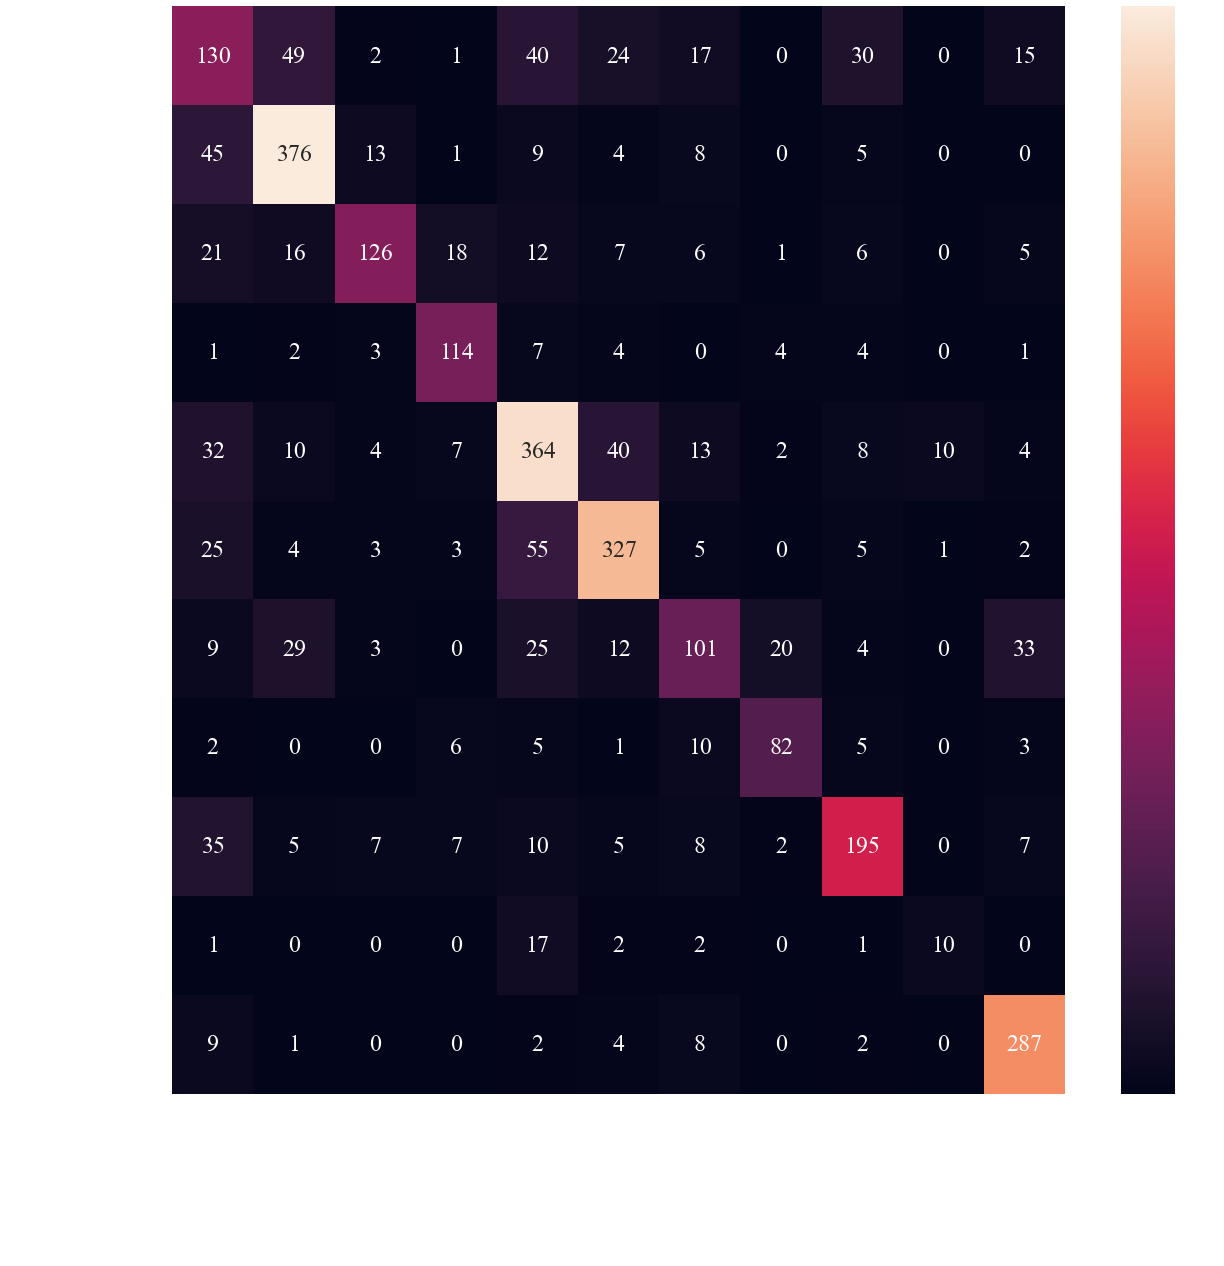

In [68]:
from sklearn.metrics import confusion_matrix

plt.rc('font',family='Times New Roman')


conf_mat = confusion_matrix(y_test, y_pred)
fig,ax1 = plt.subplots(figsize=(20,20))



ax = sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=etiquetas, 
    yticklabels=etiquetas)



ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')


plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.savefig("matriz_confusion.png", transparent=True)
plt.show()


# Model Evaluation

In [24]:
model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  *Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  *Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

c:\Users\Ricardo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'Administración y gestión de empresas':
  *Top unigrams:
       . administración
       . empresa
  *Top bigrams:
       . administración empresas
       . lic administración
# 'Ayudante General':
  *Top unigrams:
       . limpieza
       . chofer
  *Top bigrams:
       . ayudante general
       . secundaria terminada
# 'Ciencias de la computación':
  *Top unigrams:
       . ciencias
       . computación
  *Top bigrams:
       . ciencias computación
       . licenciatura ciencias
# 'Contabilidad y fiscalización':
  *Top unigrams:
       . contabilidad
       . fiscal
  *Top bigrams:
       . licenciatura contabilidad
       . analista cuentas
# 'Derecho':
  *Top unigrams:
       . derecho
       . derechos
  *Top bigrams:
       . licenciatura derecho
       . lic derecho
# 'Docencia':
  *Top unigrams:
       . docente
       . alumnos
  *Top bigrams:
       . puesto medio
       . impartir clases
# 'Enfermería':
  *Top unigrams:
       . enfermería
       . enfermera
  *Top bigrams:

In [25]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['category'].unique()))

                                                               precision    recall  f1-score   support

                         Administración y gestión de empresas       0.42      0.42      0.42       308
                                 Contabilidad y fiscalización       0.76      0.82      0.79       461
                                                      Derecho       0.78      0.58      0.66       218
                                                     Docencia       0.73      0.81      0.77       140
             Tecnologías de la información  y la comunicación       0.67      0.74      0.70       494
Ingeniería industrial, mecánica, electrónica & Diseño grafico       0.76      0.76      0.76       430
          Medicina, médico general, Médico pasante, radiologo       0.57      0.43      0.49       236
                                                   Enfermería       0.74      0.72      0.73       114
                                                   Psicología       0.74

la precision es la capacidad del clasificador para no etiquetar como positiva una muestra que es negativa, y la recall es la capacidad del clasificador para encontrar todas las muestras positivas.

La puntuación F1 se puede interpretar como una media armónica de precisión y recuperación, donde una puntuación F1 alcanza su mejor valor en 1 y su peor puntuación en 0.

El support es el número de ocurrencias de cada clase en y_true.